In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline
from preprocess2 import reduceCategories
from preprocess2 import drop_ColumnsNan
from preprocess2 import classify_vars
from preprocess2 import categ_str
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tableone  import TableOne
import Models2 as Models
from Models2 import GridSearchLogisticRegression
from Models2 import GridSearchAdaBoost
from Models2 import GridSearchRandomForest
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assesment
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score

In [2]:
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/it-ces/Analytics-puj/main/03%20CSV%20data%20--%20STC(A)_numerical%20dates.csv")
df.drop(columns=['ID'], inplace=True)
# Convertimos a variables categoricas
for col in ['From.Grade','To.Grade','Is.Non.Annual.',
   'Parent.Meeting.Flag','Days','CRM.Segment','MDR.High.Grade',
   'School.Sponsor','NumberOfMeetingswithParents','SingleGradeTripFlag','Retained.in.2012.']:
    df[col] = df[col].astype('category')
#df.info()

In [4]:
categorical, nonormal,  normal = classify_vars(df)
df[nonormal + normal].describe()

,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,EZ.Pay.Take.Up.Rate,...,Num.of.Non_FPP.PAX,Early.RPL,Latest.RPL,Initial.System.Date,Total.School.Enrollment,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FPP.to.School.enrollment
count,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,...,2389.000000,1716.000000,2370.000000,2381.000000,2298.000000,2052.000000,2052.000000,2052.000000,2052.000000,2298.000000
mean,40670.764337,40674.498535,40475.821264,1615.217664,16.867727,3.305567,0.570743,4.807451,2.953537,0.207943,...,2.953537,40262.522727,40410.118565,40297.471651,648.358573,40408.495614,40441.601365,262.083821,228.978070,0.066184
std,35.217643,35.243691,37.906251,645.096047,16.942782,3.677022,0.230666,4.661194,2.876422,0.155654,...,2.876422,45.190327,55.957665,89.818106,411.727720,72.393761,43.666436,79.520208,53.636014,0.081112
min,40557.000000,40557.000000,40081.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,39920.000000,39979.000000,39905.000000,19.000000,39945.000000,39945.000000,-204.000000,-204.000000,0.000922
25%,40642.000000,40645.000000,40466.000000,1174.000000,6.000000,1.000000,0.455000,2.000000,1.000000,0.100000,...,1.000000,40234.000000,40409.000000,40236.000000,360.000000,40404.250000,40429.000000,208.000000,196.750000,0.020787
50%,40680.000000,40683.000000,40479.000000,1700.000000,12.000000,2.000000,0.600000,4.000000,2.000000,0.200000,...,2.000000,40262.000000,40417.000000,40281.000000,597.000000,40435.000000,40442.000000,250.000000,233.000000,0.045256
75%,40701.000000,40704.000000,40487.000000,2048.000000,23.000000,4.000000,0.727000,6.000000,4.000000,0.292000,...,4.000000,40294.000000,40430.000000,40333.000000,825.750000,40449.000000,40451.000000,287.000000,261.000000,0.087517
max,40724.000000,40729.000000,40846.000000,4200.000000,257.000000,45.000000,1.000000,39.000000,47.000000,1.750000,...,47.000000,40490.000000,40609.000000,40607.000000,3990.000000,40821.000000,40821.000000,749.000000,749.000000,2.052632


In [5]:
# Unbalanced data!
df['Retained.in.2012.'].value_counts(normalize=True)

1    0.607367
0    0.392633
Name: Retained.in.2012., dtype: float64

In [6]:
categorical.remove('Retained.in.2012.')
mytable = TableOne(df,categorical=categorical, nonnormal=nonormal,  groupby='Retained.in.2012.', pval=True)
mytable # This table could be exported as Word, excel and LaTeX...

Grouped by Retained.in.2012.                                                                                         
                                                                                      Missing                    Overall                          0                          1 P-Value
n                                                                                                                   2389                        938                       1451        
Program.Code, n (%)                       CC                                                0                   14 (0.6)                    4 (0.4)                   10 (0.7)  <0.001
                                          CD                                                                   114 (4.8)                   38 (4.1)                   76 (5.2)        
                                          CN                                                                     4 (0.2)                    1 (0.1)                    3 (0.2)        
                                          CVP                                                                    3 (0.1)                    3 (0.3)                                   
                                          FN                                                                     1 (0.0)                    1 (0.1)                                   
                                          HC                                                                  274 (11.5)                  96 (10.2)                 178 (12.3)        
                                          HD                                                                 1430 (59.9)                 528 (56.3)                 902 (62.2)        
                                          HF                                                                     6 (0.3)                    2 (0.2)                    4 (0.3)        
                                          HG                                                                    25 (1.0)                    5 (0.5)                   20 (1.4)        
                                          HH                                                                     3 (0.1)                    3 (0.3)                                   
                                          HIS                                                                    5 (0.2)                    2 (0.2)                    3 (0.2)        
                                          HN                                                                    73 (3.1)                   40 (4.3)                   33 (2.3)        
                                          HO                                                                    11 (0.5)                    5 (0.5)                    6 (0.4)        
                                          HS                                                                   131 (5.5)                   43 (4.6)                   88 (6.1)        
                                          HVP                                                                   62 (2.6)                   32 (3.4)                   30 (2.1)        
                                          HW                                                                     9 (0.4)                    5 (0.5)                    4 (0.3)        
                                          HX                                                                     3 (0.1)                    1 (0.1)                    2 (0.1)        
                                          HY                                                                     7 (0.3)                    2 (0.2)                    5 (0.3)        
                                          HZ                                                                     7 (0.3)                    1 (0.1)                    6 (0.4)        
                                       

In [7]:
# Modelling...
target = 'Retained.in.2012.'
X = df.drop(columns=target)
y = df[target].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 666, stratify=y)

In [8]:
# Creating pipelines...

Normal_trasnform = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()), ])


NoNormal_transform = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),])


Categorical_transform = Pipeline([
    ('objects', categ_str() ),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('reduceCategories', reduceCategories(min_percent=0.01)),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')), ])

# Create a column transformer for preprocessing
preprocessing = ColumnTransformer([
    ('Normal_pipe', Normal_trasnform, normal),
    ('NoNormal_pipe', NoNormal_transform, nonormal),
    ('Categorical_pipe',Categorical_transform, categorical)
    ])

# Create a pipeline
classifiers = {
              #'SupportVector': GridSearchSVC(),
              'RandomForest':GridSearchRandomForest(),
              'Adaboost': GridSearchAdaBoost(),
              'LogitSearch': GridSearchLogisticRegression()}
betters_models = {} # Here keep the better hyperparametes for each classifier...!
for classifier in classifiers:
    print("-"*50)
    print(classifier)
    print("-"*50)
    pipeline = Pipeline([
    ('preprocessor', preprocessing),
    (classifier, classifiers[classifier])])
    pipeline.fit(X_train,y_train)
    betters_models[classifier] = pipeline[classifier].hypers()
    preds = pipeline.predict(X_test)
    print(classification_report(y_test, preds))
# The better model is Adaboost given have the higher f1-score.

--------------------------------------------------
RandomForest
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       188
           1       0.75      0.90      0.82       290

    accuracy                           0.75       478
   macro avg       0.76      0.71      0.72       478
weighted avg       0.76      0.75      0.74       478

--------------------------------------------------
Adaboost
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       188
           1       0.81      0.88      0.84       290

    accuracy                           0.80       478
   macro avg       0.80      0.78      0.79       478
weighted avg       0.80      0.80      0.80       478

--------------------------------------------------
LogitSearch
--------------------------------------------------
      

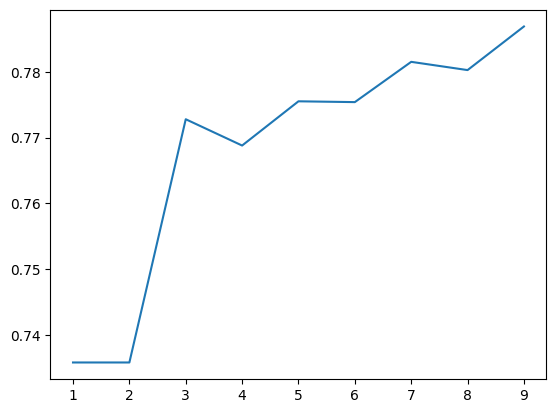

In [9]:
# How change the performace with different hyperparameters!
X_train_ = preprocessing.fit_transform(X_train)
results_  = Models.grid_KNN(X_train_, y_train, performance_metric='f1', resultsGrid=True)
fix_parameters = {'weights':'distance'}
X,perfs = Models.Plot_parameter_score(results_, fix_parameters, 'n_neighbors')
plt.plot(X,perfs)

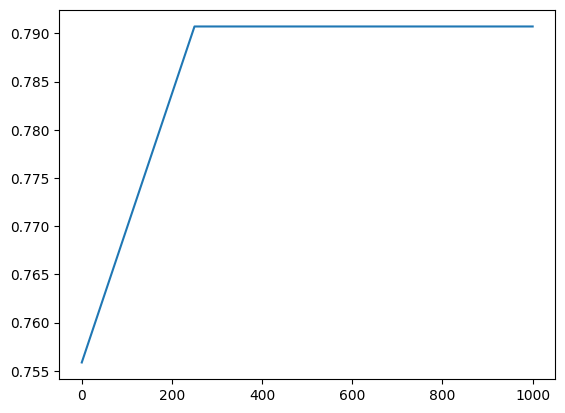

In [10]:
# How change the performace with different values in C hyperparameters!
# This function is general only change the parameters that you want fix and 
# change in plot_parameter 
X_train_ = preprocessing.fit_transform(X_train)
results_  = Models.grid_SVC(X_train_, y_train, performance_metric='f1', resultsGrid=True)
fix_parameters = {'gamma':'scale', 'kernel':'poly'}
X,perfs = Models.Plot_parameter_score(results_, fix_parameters, 'C')
plt.plot(X,perfs)